In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.colors as mcolors
from tqdm import tqdm

In [8]:
Pi = np.arccos(-1)
def omega(n,r,N,R,a):
    return (1.5*Pi*a**2)**3*n**1.5*(N-n)**1.5*np.exp(-3/(2*a**2)*((r[0]**2+r[1]**2)/n+((R[0]-r[0])**2+(R[1]-r[1])**2)/(N-n)))
def Omega(r,N,R,a):
    if norm(r) + norm(R-r)>N*a:
        return 0.
    nmin = int(norm(r)/a)
    nmax = int(N-norm(R-r)/a)
    return sum([omega(n,r,N,R,a) for n in range(nmin,nmax)])

In [50]:
a = 1
N = 100
R = np.array([0,50])
X,Y = np.linspace(-25,75,100),np.linspace(-50,50,100)
dx,dy = X[1]-X[0],Y[1]-Y[0]

In [51]:
Color = np.zeros((X.shape[0],Y.shape[0]),dtype=float)
for i,x in tqdm(enumerate(X)):
    for j,y in enumerate(Y):
        xy = np.array([x,y])
        Color[i,j] = Omega(xy,N,R,a)*dx*dy

23it [00:00, 43.32it/s]<ipython-input-8-2f0f62c8a98b>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (1.5*Pi*a**2)**3*n**1.5*(N-n)**1.5*np.exp(-3/(2*a**2)*((r[0]**2+r[1]**2)/n+((R[0]-r[0])**2+(R[1]-r[1])**2)/(N-n)))
100it [00:01, 79.28it/s]


In [52]:
X,Y = np.meshgrid(X,Y)

In [53]:
Color = Color/sum(Color)

<ipython-input-53-c95673da10bd>:1: RuntimeWarning: invalid value encountered in true_divide
  Color = Color/sum(Color)


<ipython-input-54-1bba7ed46c18>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X,Y,Color,norm=mcolors.LogNorm())


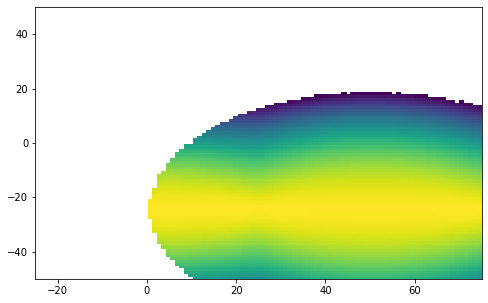

In [54]:
fig,ax = plt.subplots(figsize=(8,5))
ax.pcolormesh(X,Y,Color,norm=mcolors.LogNorm())